In [78]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


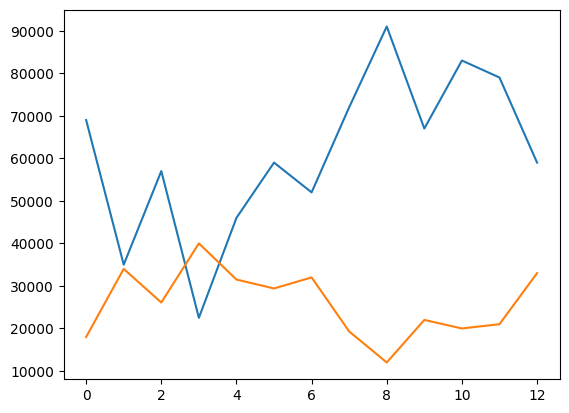

In [80]:
plt.plot(df.Mileage)
plt.plot(df['Sell Price($)'])

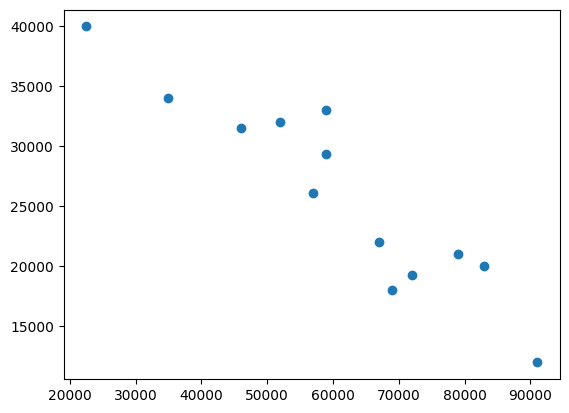

In [81]:
plt.scatter(df['Mileage'], df['Sell Price($)'])

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
dfle = df

In [58]:
le = LabelEncoder()
dfle['Car Model']= le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [59]:
X = dfle.drop(['Sell Price($)'], axis=1)
X = X.iloc[:, 0].values
X = X.reshape(-1,1)
X

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]])

In [60]:
ohe = OneHotEncoder(handle_unknown='ignore')
X = ohe.fit_transform(X).toarray()
X = X[:,1:]

In [61]:
X.shape

(13, 2)

In [72]:
X_ = pd.DataFrame(X)
X_.columns = ['BMW','Audi']

In [73]:
y_in = df['Sell Price($)'].values
y_in= y_in.reshape(-1,1)

In [74]:
X_in = pd.concat((X_,df['Mileage'],df['Age(yrs)']), axis=1)
X_in

,BMW,Audi,Mileage,Age(yrs)
0,1.0,0.0,69000,6
1,1.0,0.0,35000,3
2,1.0,0.0,57000,5
3,1.0,0.0,22500,2
4,1.0,0.0,46000,4
5,0.0,0.0,59000,5
6,0.0,0.0,52000,5
7,0.0,0.0,72000,6
8,0.0,0.0,91000,8
9,0.0,1.0,67000,6


In [75]:
reg = linear_model.LinearRegression()
reg.fit(X_in, y_in)

LinearRegression()

In [76]:
reg.score(X_in, y_in)

0.9417050937281083

In [77]:
reg.predict(X_in)

array([[18705.2723644 ],
       [35286.78445645],
       [24479.19112468],
       [41245.76426391],
       [29882.98779056],
       [28023.6135243 ],
       [30614.46818502],
       [21879.57266964],
       [12182.34562104],
       [26183.72387885],
       [18929.31674102],
       [20409.80511857],
       [30477.15426157]])